## Exploratory Data Analysis of Aircrashes(1902-2020)

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import and Read the Dataset as DataFrame

In [3]:
df = pd.read_excel('air_crash_cleaned.xlsx')
df.head()

,Date,Year,Location,State,Country,Operator,Flight #,Route,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1921-04-06,1921.0,"Point Cook, Australia",Point Cook,Australia,Military - Royal Australian Air Force,NaN,unknown,\t Avro 504,H3021,2.0,0.0,0.0,2.0,0.0,0.0,0.0,"Shortly after taking off on a training flight,..."
1,2010-08-03,2010.0,"Igarka, Russia",Igarka,Russia,Katekavia Airline,KYU9357,Karsnoyarsk - Igarka,Antonov An-24 V,RA-46524,15.0,12.0,3.0,12.0,11.0,1.0,0.0,The plane crashed while on approach to Igarka ...
2,2009-02-25,2009.0,"Amsterdam, Netherlands",Amsterdam,Netherlands,Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,134.0,127.0,7.0,9.0,6.0,3.0,0.0,The plane was on final approach to Runway 18R ...
3,2016-12-18,2016.0,"Near Wamena, Papua, Indonesia","Near Wamena, Papua",Indonesia,Indonesian Air Force,NaN,Timika - Warmera,\tLockheed C-130H Hercules,\tA-1134,13.0,10.0,3.0,13.0,10.0,3.0,0.0,The military plane crashed into mountainous te...
4,1953-08-05,1953.0,Off Irish coast,Off,coast,Military - U.S. Air Force,NaN,Travis - Lakenheath,Convair B-36,52-1369,23.0,0.0,23.0,19.0,0.0,19.0,0.0,Crashed into the Atlantic Ocean after two of i...


In [4]:
## Have brief look to the data
df.describe()

,Date,Year,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4998,4998.000000,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,1971-07-04 09:31:37.238895560,1970.990796,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
min,1908-09-17 00:00:00,1908.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-06-15 06:00:00,1951.000000,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1970-11-27 00:00:00,1970.000000,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,1992-06-06 18:00:00,1992.000000,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,2023-11-01 00:00:00,2023.000000,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000
std,NaN,24.796492,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273


In [5]:
## Knowing the shape of my data
df.shape
## Drop Duplicates if any
df.drop_duplicates(inplace = True)
## View the shape again to see if it changes
df.shape
#it did not change so non duplicates found

(4999, 18)

In [6]:
##View information about the non null columns and datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4998 non-null   datetime64[ns]
 1   Year                   4998 non-null   float64       
 2   Location               4994 non-null   object        
 3   State                  4986 non-null   object        
 4   Country                4992 non-null   object        
 5   Operator               4988 non-null   object        
 6   Flight #               1329 non-null   object        
 7   Route                  4998 non-null   object        
 8   AC Type                4983 non-null   object        
 9   Registration           4724 non-null   object        
 10  Aboard                 4980 non-null   float64       
 11  Aboard Passangers      4769 non-null   float64       
 12  Aboard Crew            4772 non-null   float64       
 13  Fat

In [7]:
#identify number of null in each column
# incase come major columns will we use for the analysis will have nul values
# we will drop then or replace with appropriated data if needed e.g ["Date", "Year", "Aboard"]
df.isnull().sum()

Date                        1
Year                        1
Location                    5
State                      13
Country                     7
Operator                   11
Flight #                 3670
Route                       1
AC Type                    16
Registration              275
Aboard                     19
Aboard Passangers         230
Aboard Crew               227
Fatalities                  9
Fatalities Passangers     243
Fatalities Crew           242
Ground                     43
Summary                    65
dtype: int64

In [8]:
## Dropping column with no date and Year since they will be useless to us
df.dropna(subset=['Date', 'Year'], inplace=True)

In [9]:
#display table on where location is null to see how we can manage the null values
null_locdf = df[df['Location'].isnull()]
null_locdf
#replacing the null values for country and State where location is null
df.loc[df['Location'].isnull(), 'Country'] = 'unknown'
#replacing location  null values for state where location in null
df.loc[df['Location'].isnull(), 'State'] = 'unknown'
#print the null_locdf to see if it changes
null_locdf
#now we relace location to unknow where it is null
df.loc[df['Location'].isnull(), 'Location'] = 'unknown'
#the null_locdf contain no row so it worked
null_locdf

,Date,Year,Location,State,Country,Operator,Flight #,Route,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
1087,1977-01-20,1977.0,NaN,NaN,NaN,North Canada Air,NaN,unknown,Bristol 170 Freighter 31M,C-FWAD,2.0,0.0,2.0,1.0,0.0,1.0,0.0,The cargo plane stalled nearly vertical and cr...
2620,1947-11-27,1947.0,NaN,NaN,NaN,China National Aviation Corporation,NaN,unknown,Douglas DC-3,NaN,3.0,0.0,3.0,2.0,0.0,2.0,0.0,The cargo plane was shot down by communist ant...
4544,1942-08-21,1942.0,NaN,NaN,NaN,Deutsche Lufthansa,NaN,unknown,Siebel Si-204,NaN,4.0,2.0,2.0,4.0,2.0,2.0,0.0,"Lufthansa chairman, Von Gablenz killed."
4717,1934-12-31,1934.0,NaN,NaN,NaN,Aeroflot,NaN,unknown,Tupolev ANT-9,NaN,10.0,8.0,2.0,10.0,8.0,2.0,0.0,Crashed under unknown circumstances.


In [10]:
df[df['State'].isnull()]

,Date,Year,Location,State,Country,Operator,Flight #,Route,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
1581,1913-08-06,1913.0,"Victoria, British Columbia, Canada",NaN,Canada,Private,NaN,unknown,Curtiss seaplane,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
1910,1912-07-12,1912.0,"Atlantic City, New Jersey",NaN,USA,Military - U.S. Navy,NaN,Test Flight,Dirigible,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
4482,1916-07-28,1916.0,"Near Jambol, Bulgeria",NaN,Bulgaria,Military - German Army,NaN,unknown,Schutte-Lanz S-L-10 (airship),NaN,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"Crashed near the Black Sea, cause unknown."
4924,1909-09-07,1909.0,"Juvisy-sur-Orge, France",NaN,France,NaN,NaN,Air show,Wright Byplane,SC1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
4925,1908-09-17,1908.0,"Fort Myer, Virginia",NaN,NaN,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
4982,1913-09-09,1913.0,Over the North Sea,NaN,NaN,Military - German Navy,NaN,unknown,Zeppelin L-1 (airship),NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
4983,1915-09-03,1915.0,"Off Cuxhaven, Germany",NaN,Germany,Military - German Navy,NaN,unknown,Zeppelin L-10 (airship),NaN,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"Exploded and burned near Neuwerk Island, when..."
4984,1913-10-17,1913.0,"Near Johannisthal, Germany",NaN,Germany,Military - German Navy,NaN,unknown,Zeppelin L-2 (airship),NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...


In [11]:
#we extract the state from Location, this is actually data cleaning sorry 
df.loc[df['State'].isnull(), 'State'] = df['Location'].str.split(',', n=1).str[0]
#ok
df.isnull().sum()

Date                        0
Year                        0
Location                    0
State                       0
Country                     2
Operator                   10
Flight #                 3669
Route                       1
AC Type                    15
Registration              274
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [12]:
#locating the countries with null values
df.loc[df['Country'].isnull()]

,Date,Year,Location,State,Country,Operator,Flight #,Route,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
4925,1908-09-17,1908.0,"Fort Myer, Virginia",Fort Myer,NaN,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
4982,1913-09-09,1913.0,Over the North Sea,Over the North Sea,NaN,Military - German Navy,NaN,unknown,Zeppelin L-1 (airship),NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [13]:
#Locatiing the country using the index and changing it to the corresponding
df.loc[4925, 'Country'] = 'USA'
df.loc[4925]

Date                                                   1908-09-17 00:00:00
Year                                                                1908.0
Location                                               Fort Myer, Virginia
State                                                            Fort Myer
Country                                                                USA
Operator                                              Military - U.S. Army
Flight #                                                               NaN
Route                                                        Demonstration
AC Type                                                   Wright Flyer III
Registration                                                           NaN
Aboard                                                                 2.0
Aboard Passangers                                                      1.0
Aboard Crew                                                            1.0
Fatalities               

In [14]:
df["Country"].fillna('unknown', inplace = True)

C:\Users\abiel\AppData\Local\Temp\ipykernel_8144\528313402.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Country"].fillna('unknown', inplace = True)


In [15]:
df.isnull().sum()

Date                        0
Year                        0
Location                    0
State                       0
Country                     0
Operator                   10
Flight #                 3669
Route                       1
AC Type                    15
Registration              274
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [16]:
#replacing the null values with unknown in the required columns
df["Operator"].fillna('unknown', inplace = True)
df["Flight #"].fillna('unknown', inplace = True)
df["Summary"].fillna('unknown', inplace = True)
df["Route"].fillna('unknown', inplace = True)
df["Route"].fillna('unknown', inplace = True)
df["Registration"].fillna('unknown', inplace = True)
df["AC Type"].fillna('unknown', inplace = True)

C:\Users\abiel\AppData\Local\Temp\ipykernel_8144\486065013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Operator"].fillna('unknown', inplace = True)
C:\Users\abiel\AppData\Local\Temp\ipykernel_8144\486065013.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [17]:
#replacing the null values with 0 in the required columns
df["Aboard"].fillna(0, inplace = True)
df["Aboard Passangers"].fillna(0, inplace = True)
df["Aboard Crew"].fillna(0, inplace = True)
df["Fatalities"].fillna(0, inplace = True)
df["Fatalities Passangers"].fillna(0, inplace = True)
df["Fatalities Crew"].fillna(0, inplace = True)

C:\Users\abiel\AppData\Local\Temp\ipykernel_8144\1872057063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Aboard"].fillna(0, inplace = True)
C:\Users\abiel\AppData\Local\Temp\ipykernel_8144\1872057063.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [18]:
#just found that the passengers column was wrongly spelled
#so i will change it form "passangers" to "passengers"
df.rename(columns={'Aboard Passangers': 'Aboard Passengers'}, inplace=True)
df.rename(columns={'Fatalities Passangers': 'Fatalities Passengers'}, inplace=True)
df.head()

,Date,Year,Location,State,Country,Operator,Flight #,Route,AC Type,Registration,Aboard,Aboard Passengers,Aboard Crew,Fatalities,Fatalities Passengers,Fatalities Crew,Ground,Summary
0,1921-04-06,1921.0,"Point Cook, Australia",Point Cook,Australia,Military - Royal Australian Air Force,unknown,unknown,\t Avro 504,H3021,2.0,0.0,0.0,2.0,0.0,0.0,0.0,"Shortly after taking off on a training flight,..."
1,2010-08-03,2010.0,"Igarka, Russia",Igarka,Russia,Katekavia Airline,KYU9357,Karsnoyarsk - Igarka,Antonov An-24 V,RA-46524,15.0,12.0,3.0,12.0,11.0,1.0,0.0,The plane crashed while on approach to Igarka ...
2,2009-02-25,2009.0,"Amsterdam, Netherlands",Amsterdam,Netherlands,Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,134.0,127.0,7.0,9.0,6.0,3.0,0.0,The plane was on final approach to Runway 18R ...
3,2016-12-18,2016.0,"Near Wamena, Papua, Indonesia","Near Wamena, Papua",Indonesia,Indonesian Air Force,unknown,Timika - Warmera,\tLockheed C-130H Hercules,\tA-1134,13.0,10.0,3.0,13.0,10.0,3.0,0.0,The military plane crashed into mountainous te...
4,1953-08-05,1953.0,Off Irish coast,Off,coast,Military - U.S. Air Force,unknown,Travis - Lakenheath,Convair B-36,52-1369,23.0,0.0,23.0,19.0,0.0,19.0,0.0,Crashed into the Atlantic Ocean after two of i...


In [19]:
df["Ground"].fillna(0, inplace = True)
df.isnull().sum()

C:\Users\abiel\AppData\Local\Temp\ipykernel_8144\1401130872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ground"].fillna(0, inplace = True)


Date                     0
Year                     0
Location                 0
State                    0
Country                  0
Operator                 0
Flight #                 0
Route                    0
AC Type                  0
Registration             0
Aboard                   0
Aboard Passengers        0
Aboard Crew              0
Fatalities               0
Fatalities Passengers    0
Fatalities Crew          0
Ground                   0
Summary                  0
dtype: int64

### Temporal Analysis

#### **Number of Crashes Over the Years**

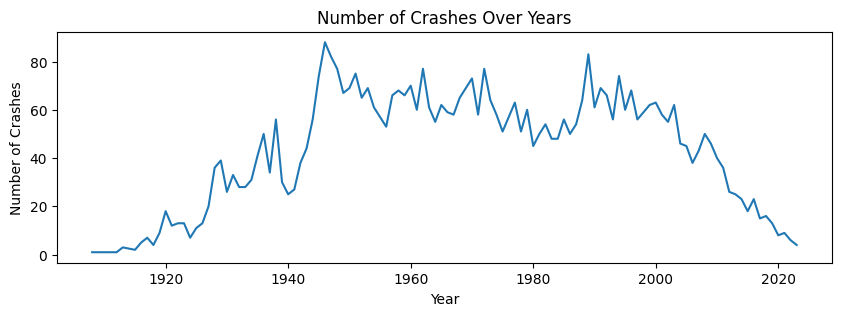

In [20]:
number_of_crashes = df.groupby('Year')['Location'].count()
number_of_crashes.plot(kind = 'line', figsize = (10,3), legend = False)
plt.xlabel('Year') #the x-axis label for the chart
plt.ylabel('Number of Crashes') #the y-axis label for the chart
plt.title('Number of Crashes Over Years') #Chart Title
plt.show()

#### **Fatalities Over the Years**

<Axes: xlabel='Year'>

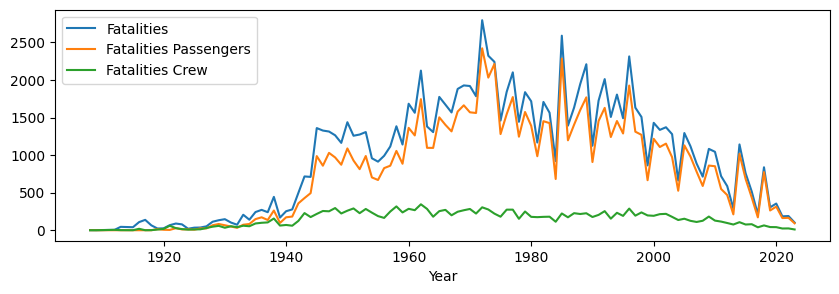

In [21]:
fatalities = df.groupby('Year').agg({'Fatalities': 'sum', 'Fatalities Passengers': 'sum', 'Fatalities Crew': 'sum' })
fatalities.plot(kind= 'line', figsize = (10,3) )

#### **Number Crashes by Country**

- Top 5 Countries with Crashes

In [22]:
crashes_by_country = (
    df.groupby('Country')
    .agg({'Year': 'count'})
    .rename(columns={'Year': 'Number of Crashes'}) #Rename the 'Year' to display as 'Number of crashes in the dataframe result
    .sort_values(by='Number of Crashes', ascending=False) #sorting the values in descending order 
)
crashes_by_country = pd.DataFrame(crashes_by_country) #so it is displayed in tabular form
crashes_by_country.head(5)

,Number of Crashes
Country,
USA,565
Russia,258
Brazil,175
Colombia,150
Canada,132


#### **Route Analysis** 

- *Top 5 Fatalities Route*

In [23]:
route_fatalities = (
    df.groupby('Route')
    .agg({'Fatalities': 'count'})
    .sort_values('Fatalities', ascending = False)
)
route_fatalities = pd.DataFrame(route_fatalities)
route_fatalities.head(5)

,Fatalities
Route,
unknown,777
Training Flight,100
Sightseeing,34
Test Flight,32
Sao Paulo - Rio de Janeiro,8


- *Top 5 Crash Routes*

In [24]:
crashes_by_route = (
    df.groupby('Route')
    .agg({'Year': 'count'})
    .rename(columns={'Year': 'Number of Crashes'}) 
    .sort_values(by='Number of Crashes', ascending=False) #sorting the values in descending order 
)
crashes_by_route = pd.DataFrame(crashes_by_route) #so it is displayed in tabular form
crashes_by_route.head(5)

,Number of Crashes
Route,
unknown,777
Training Flight,100
Sightseeing,34
Test Flight,32
Sao Paulo - Rio de Janeiro,8


### Operator Analysis

In [25]:
crashes_by_operator = (
    df.groupby('Operator')
    .agg({'Year': 'count'})
    .rename(columns={'Year': 'Number of Crashes'}) #Rename the 'Year' to display as 'Number of crashes in the dataframe result
    .sort_values(by='Number of Crashes', ascending=False) #sorting the values in descending order 
)
crashes_by_operator = pd.DataFrame(crashes_by_operator) #so it is displayed in tabular form
crashes_by_operator.head(5)

,Number of Crashes
Operator,
Aeroflot,255
Military - U.S. Air Force,140
Air France,72
Deutsche Lufthansa,63
United Air Lines,44


In [26]:
### Crashes by AC Type

In [27]:
crashes_by_ac_type = (
    df.groupby('AC Type')
    .agg({'Year': 'count'})
    .rename(columns={'Year': 'Number of Crashes'}) #Rename the 'Year' to display as 'Number of crashes in the dataframe result
    .sort_values(by='Number of Crashes', ascending=False) #sorting the values in descending order 
)
crashes_by_ac_type = pd.DataFrame(crashes_by_ac_type) #so it is displayed in tabular form
crashes_by_ac_type.head(5)

,Number of Crashes
AC Type,
Douglas DC-3,333
De Havilland Canada DHC-6 Twin Otter 300,82
Douglas C-47A,70
Douglas C-47,64
Douglas DC-4,38
